In [14]:
import gstools as gs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
# Leemos los datos

df = pd.read_table('datos.txt', sep = ' ')
df.columns = [column.replace(" ", "_") for column in df.columns]
df.head(10)

,id,x,y,z,tonn,blockvalue,destination,CU%,process_profit
0,0,11,0,18,16380,-12285.0,2,0.0,0.0
1,1,12,0,18,16380,-12285.0,2,0.0,0.0
2,2,13,0,18,16380,-12285.0,2,0.0,0.0
3,3,13,1,18,16380,-12285.0,2,0.0,0.0
4,4,14,0,18,16380,-12285.0,2,0.0,0.0
5,5,14,1,18,16380,-12285.0,2,0.0,0.0
6,6,15,1,18,16380,-12285.0,2,0.0,0.0
7,7,16,1,18,16380,-12285.0,2,0.0,0.0
8,8,7,0,17,16380,-12285.0,2,0.0,0.0
9,9,8,0,17,12000,-9000.0,2,0.0,0.0


In [16]:
# Vemos si hay valores Nan

check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [17]:
# Indicadores generales del data frame

df_tem = df.drop(columns=['id','blockvalue','destination','process_profit'])
df_tem.describe()

,x,y,z,tonn,CU%
count,14153.000000,14153.000000,14153.000000,14153.000000,14153.000000
mean,41.677383,19.022893,10.666714,15736.597188,0.353761
std,18.497473,7.440534,3.406372,1022.696868,0.435775
min,0.000000,0.000000,0.000000,12000.000000,0.000000
25%,27.000000,14.000000,9.000000,15360.000000,0.000000
50%,44.000000,19.000000,11.000000,16140.000000,0.000000
75%,57.000000,24.000000,13.000000,16260.000000,0.791000
max,77.000000,41.000000,18.000000,16380.000000,1.830000


In [18]:
i=0
combined_df = pd.DataFrame()
combined_dfm = pd.DataFrame()

while (combined_df.shape)[0]<850:
    df_tem  = df.sample(n=1)
    df_tem = df_tem.drop(columns=['id', 'z','blockvalue','destination','process_profit','tonn','CU%'])
    df_tem_two = np.array(df_tem)
    A = df_tem_two[0][0]
    B = df_tem_two[0][1]
    df_tem_three = df.query('x == @A and y == @B', inplace=False)
    if (combined_df.shape)[0]<150:
        combined_dfm = pd.concat([combined_dfm, df_tem_three], ignore_index=True)
        combined_dfm = combined_dfm.drop_duplicates()
    combined_df = pd.concat([combined_df, df_tem_three], ignore_index=True)
    combined_df = combined_df.drop_duplicates()
    i=i+1

In [19]:
combined_df.describe()

,id,x,y,z,tonn,blockvalue,destination,CU%,process_profit
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,7765.264327,43.680702,18.697076,10.064327,15771.859649,49907.285898,1.552047,0.386053,61736.180635
std,4080.227056,17.688358,5.759275,3.530971,860.315382,74048.321119,0.497575,0.448830,74322.758910
min,127.000000,3.000000,3.000000,0.000000,12000.000000,-12285.000000,1.000000,0.000000,0.000000
25%,4291.500000,33.000000,15.000000,8.000000,15360.000000,-11520.000000,1.000000,0.000000,0.000000
50%,8020.000000,48.000000,19.000000,11.000000,16140.000000,-11520.000000,2.000000,0.000000,0.000000
75%,11368.500000,57.000000,22.000000,13.000000,16260.000000,120208.079550,2.000000,0.826500,132368.806550
max,14132.000000,76.000000,39.000000,16.000000,16380.000000,260873.851800,2.000000,1.399000,273068.851800


In [20]:
XV = combined_df.drop(columns=['id','blockvalue','destination','process_profit','tonn','CU%'])
XV.head()

,x,y,z
0,60,30,13
1,60,30,12
2,60,30,11
3,60,30,10
4,60,30,9


In [21]:
X = combined_df.drop(columns=['id', 'y', 'z', 'blockvalue','destination','process_profit','tonn','CU%'])
Y = combined_df.drop(columns=['id', 'x', 'z', 'blockvalue','destination','process_profit','tonn','CU%'])
Z = combined_df.drop(columns=['id', 'x', 'y', 'blockvalue','destination','process_profit','tonn','CU%'])
CU = combined_df.drop(columns=['id', 'x', 'y', 'z', 'blockvalue','destination','process_profit','tonn'])

In [22]:
X = (np.array(X).astype(float)).flatten()
Y = (np.array(Y).astype(float)).flatten()
Z = (np.array(Z).astype(float)).flatten()
CU = (np.array(CU).astype(float)).flatten()

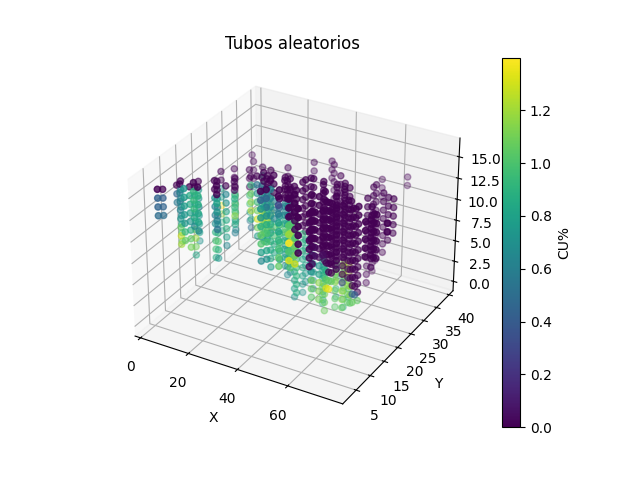

In [23]:
%matplotlib widget

# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
scatter = ax.scatter(X, Y, Z, c=CU, cmap='viridis')

# Add a colorbar
colorbar = plt.colorbar(scatter)
colorbar.set_label('CU%')


# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set title
ax.set_title('Tubos aleatorios')

# Show the plot
plt.show()

In [24]:
XV = np.array(XV).astype(float)

In [25]:
cu_value = np.array(combined_df['CU%']).astype(float)

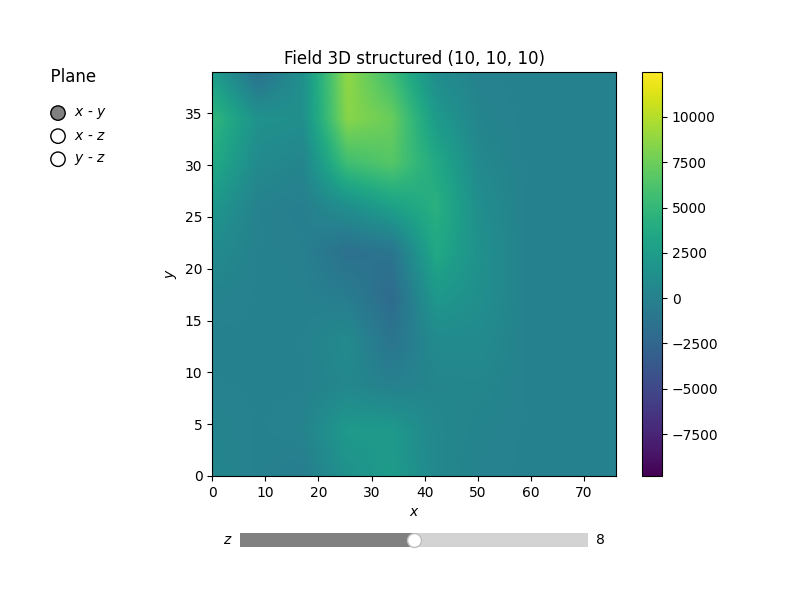

<Axes: title={'center': 'Field 3D structured (10, 10, 10)'}, xlabel='$x$', ylabel='$y$'>

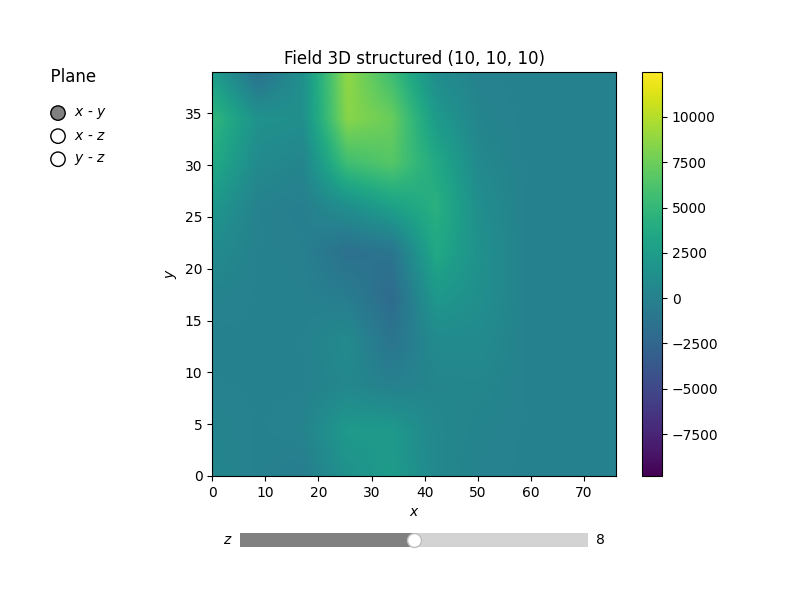

In [26]:
%matplotlib widget

# Observed Data
data_pos = XV
data_val = cu_value

# Create a Gaussian model
model = gs.Gaussian(dim=3, var=1, len_scale=10)

# Create a kriging object with the model and the observed data
krig = gs.krige.Simple(model, cond_pos=data_pos, cond_val=data_val, mean=0.353761)

# Create a conditioned spatial random field (SRF) with the kriging object
srf = gs.CondSRF(krig)

# Generate a field realization on a grid
gridx = np.linspace(0.0, max(np.array(combined_df['x']).astype(float)), 10)
gridy = np.linspace(0.0, max(np.array(combined_df['y']).astype(float)), 10)
gridz = np.linspace(0.0, max(np.array(combined_df['z']).astype(float)), 10)

field = srf.structured([gridx, gridy, gridz])

# Plot the field
srf.plot()
